In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
X = df.drop(columns=["Survived"])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [7]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [8]:
X_train['Age_Median'] = X_train['Age'].fillna(median_age)
X_train['Age_Mean'] = X_train['Age'].fillna(mean_age)
X_train['Fare_Median'] = X_train['Age'].fillna(median_fare)
X_train['Fare_Mean'] = X_train['Age'].fillna(mean_fare)

In [9]:
X_train.sample(3)

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
500,17.0,8.6625,0,17.0,17.0,17.0,17.0
348,3.0,15.9000,2,3.0,3.0,3.0,3.0
463,48.0,13.0000,0,48.0,48.0,48.0,48.0


In [10]:
print(X_train['Age'].var())
print(X_train['Age_Mean'].var())
print(X_train['Age_Median'].var())
print(X_train['Fare'].var())
print(X_train['Fare_Mean'].var())
print(X_train['Fare_Median'].var())

210.2517072477435
168.85193366872227
169.20731007048155
2761.0314349486343
170.293663500021
204.91494514688915


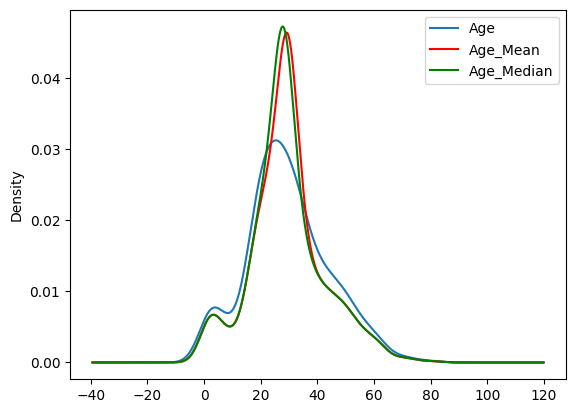

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_Mean'].plot(kind='kde', ax=ax, color='red')
X_train['Age_Median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

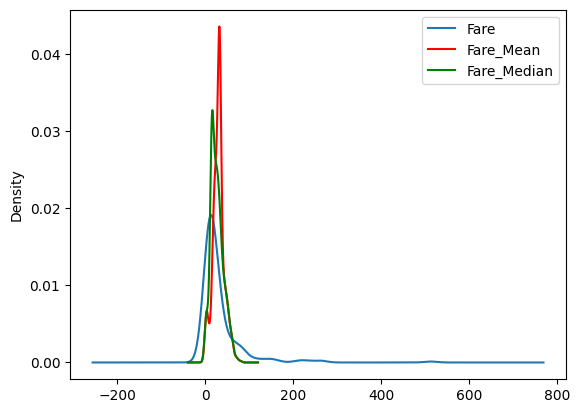

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_Mean'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_Median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [13]:
X_train.cov()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,210.251707,210.251707
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,97.632173,52.745200
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,-5.328300,-5.673883
Age_Median,210.251707,63.938058,-5.587710,169.207310,168.851934,172.431870,168.136143
Age_Mean,210.251707,60.224654,-5.616299,168.851934,168.851934,168.851934,168.851934
Fare_Median,210.251707,97.632173,-5.328300,172.431870,168.851934,204.914945,161.641308
Fare_Mean,210.251707,52.745200,-5.673883,168.136143,168.851934,161.641308,170.293664


In [14]:
X_train.corr()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,1.000000,1.000000
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,0.129700,0.076859
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,-0.221228,-0.258416
Age_Median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.926022,0.990495
Age_Mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.907750,0.995758
Fare_Median,1.000000,0.129700,-0.221228,0.926022,0.907750,1.000000,0.865299
Fare_Mean,1.000000,0.076859,-0.258416,0.990495,0.995758,0.865299,1.000000


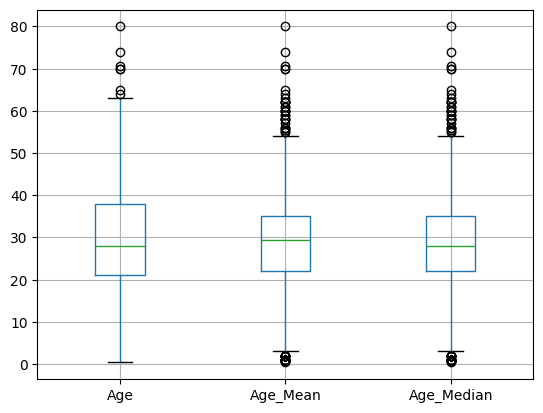

In [15]:
X_train[['Age', 'Age_Mean', 'Age_Median']].boxplot()
plt.show()

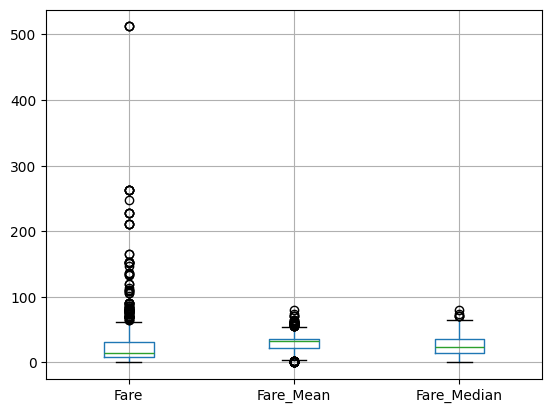

In [16]:
X_train[['Fare', 'Fare_Mean', 'Fare_Median']].boxplot()
plt.show()

### Using Sklearn

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [19]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [20]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [21]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [22]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]], shape=(712, 3))